In [25]:
import pandas as pd

In [26]:
import numpy as np

In [27]:
from scipy.optimize import curve_fit

In [28]:
import matplotlib.pyplot as plt

In [29]:
tab_1 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 1')

In [30]:
tab_2 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 2')

In [31]:
tab_3 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 3')

In [32]:
tab_4 = pd.read_excel(r'data/data.xlsx', sheet_name='Tab 4')

In [18]:
# tab_1 = tab_1[1:]

In [19]:
tab_1

GRP         1+
1       1   0.448006
2       2   0.761610
3       3   1.164815
4       4   1.545620
5       5   1.926425
..    ...        ...
139  1210  53.370592
140  1220  54.034806
141  1230  54.216109
142  1240  53.766131
143  1250  53.531903

[143 rows x 2 columns]

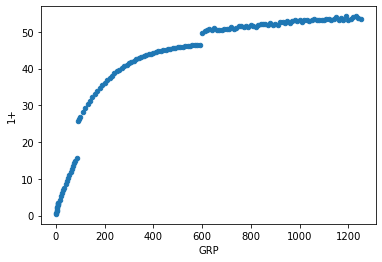

In [20]:
tab_1.plot.scatter(x="GRP", y="1+");

In [35]:
x = tab_1.GRP

In [36]:
y = tab_1['1+']

In [13]:
# objective function
def linear(x, a, b):
	return a * x + b

In [39]:
def log_stack(x, a, b, c): # x-shifted log
    return a*np.log(x + b)+c

In [14]:
def Hyp_func(x, a,b):
    return a*np.log(x)+b

In [40]:
# fit curve
parameters, covariance = curve_fit(log_stack, x, y)

/home/byun/extra/miniconda/envs/nlp/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
parameters

array([ 10.54012808, -20.2568582 ])

In [17]:
par_a, par_b = parameters
print('y = %.5f * x + %.5f' % (par_a, par_b))

y = 1.00000 * x + 1.00000


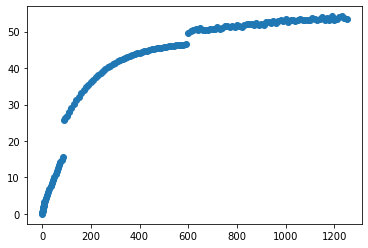

In [48]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)

In [49]:
# calculate the output for the range
y_line = objective(x_line, a, b)

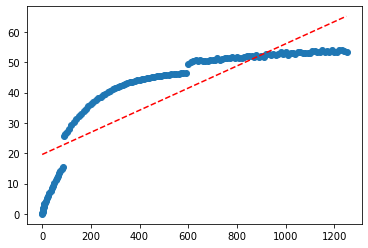

In [52]:
# plot input vs output
plt.scatter(x, y)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [58]:
se = np.sqrt(np.diag(covariance))
se_a = se[0]
se_b = se[1]

print(F'The value of A is {par_a:.5f} with standard error of {se_a:.5f}.')
print(F'The value of B is {par_b:.5f} with standard error of {se_b:.5f}.')

The value of A is 0.03651 with standard error of 0.00194.
The value of B is 19.60341 with standard error of 1.31001.


In [59]:
def whole_process(func, x, y):
    
    parameters, covariance = curve_fit(func, x, y)
    
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = np.arange(min(x), max(x), 1)
    
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    
    # plot input vs output
    plt.scatter(x, y)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')
    plt.show()
    
    se = np.sqrt(np.diag(covariance))
    se_a = se[0]
    se_b = se[1]

    print(F'The value of A is {par_a:.5f} with standard error of {se_a:.5f}.')
    print(F'The value of B is {par_b:.5f} with standard error of {se_b:.5f}.')

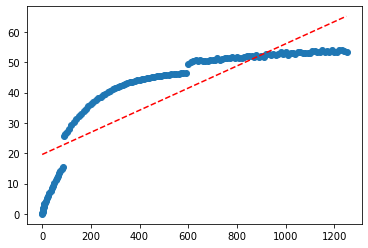

The value of A is 0.03651 with standard error of 0.00194.
The value of B is 19.60341 with standard error of 1.31001.


In [61]:
whole_process(linear, x, y)

In [1]:
def Hyp_func(x, a,b):
    return a*np.log(x)+b